# Introdução a Data Science com Pokemon

[arquivos para baixar](https://expirebox.com/download/3c7b9f5c55a352462fb6508ddac37486.html)

<img src='pokemon.jpg'>

### Workflow usual 

- Coletar dados crus
- Processar os dados
- Limpar dataset
- Realizar análise exploratória 
- aplicar modelos algoritmos 
- visualização de dados
- fazer decisões sobre os resultados 

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# para gerar o gráfico na célula
%matplotlib inline

In [61]:
df = pd.read_csv('Pokemon.csv')

In [48]:
df.head(3)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


In [8]:
df[df['Legendary'] == True].head(3)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
156,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
157,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
158,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True


In [9]:
df[df['Attack'] > 100].head(3)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
12,9,BlastoiseMega Blastoise,Water,NaN,630,79,103,120,135,115,78,1,False


### Limpar os dados

Vamos tirar algumas partes indesejadas nos nomes dos pokemons.

In [49]:
def remove_mega(x):
    '''Recebe uma string e retorna a string sem 
    Mega no nome, caso tenha.'''
    
    mega_position = x.find('Mega')
    if mega_position != -1:
        return x[mega_position:]
    else:
        return x

In [50]:
df['Name'] = df['Name'].apply(remove_mega)

In [51]:
df = df.set_index('Name').head(3)

In [52]:
df.head(3)

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False


In [54]:
df['Type 2'] = df['Type 2'].fillna(0)

In [55]:
df[(df['Type 1'] == 'Fire') | (df['Type 2'] == 'Dragon')]

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,


In [40]:
'Maior HP %s' % df['HP'].argmax()

'Maior HP Venusaur'

### Venusaur

<img src='venasur.jpg'>

In [42]:
strong  = df.sort_values(by='Total', ascending=False)

In [43]:
strong.drop_duplicates(subset='Type 1', keep='first')

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False


In [62]:
len(df['Type 1'].unique())

18

In [63]:
df.groupby('Type 1').size()

Type 1
Bug          69
Dark         31
Dragon       32
Electric     44
Fairy        17
Fighting     27
Fire         52
Flying        4
Ghost        32
Grass        70
Ground       32
Ice          24
Normal       98
Poison       28
Psychic      57
Rock         44
Steel        27
Water       112
dtype: int64

In [64]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


### Visualização

In [72]:
from scipy.stats import norm 
import sklearn

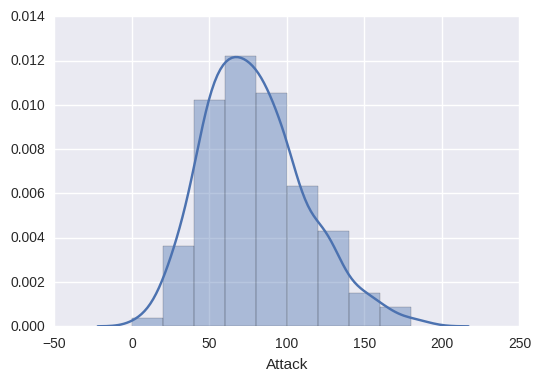

In [70]:
sns.distplot(df['Attack'], bins=range(0, 200, 20));

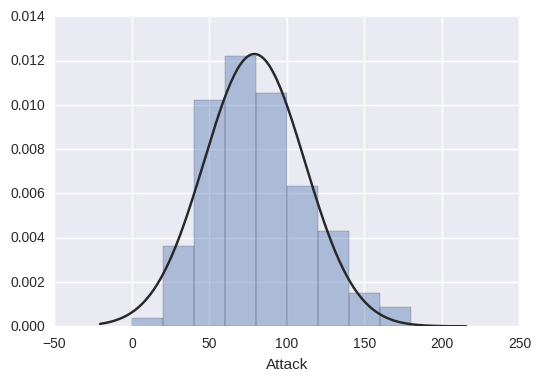

In [74]:
# em vez de plotar uma curva por padrão 
# podemos informar alguma outra curva
# como a normal por exemplo
sns.distplot(df['Attack'], bins=range(0, 200, 20), kde=False, fit=norm);

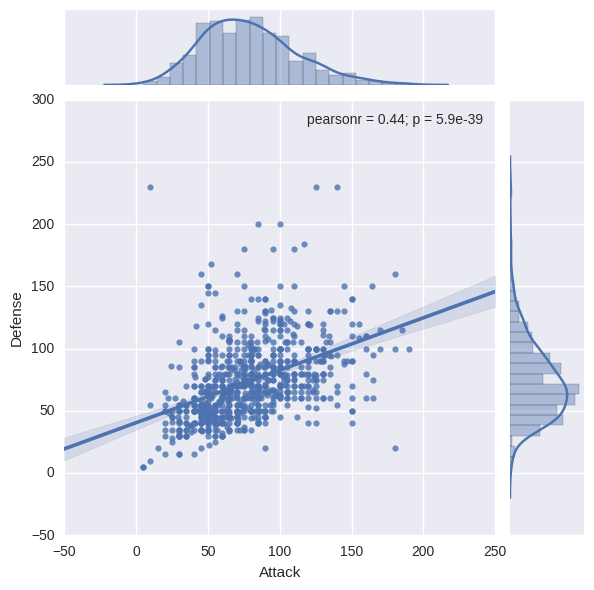

In [80]:
sns.jointplot(x='Attack', y='Defense', data=df, kind='reg');

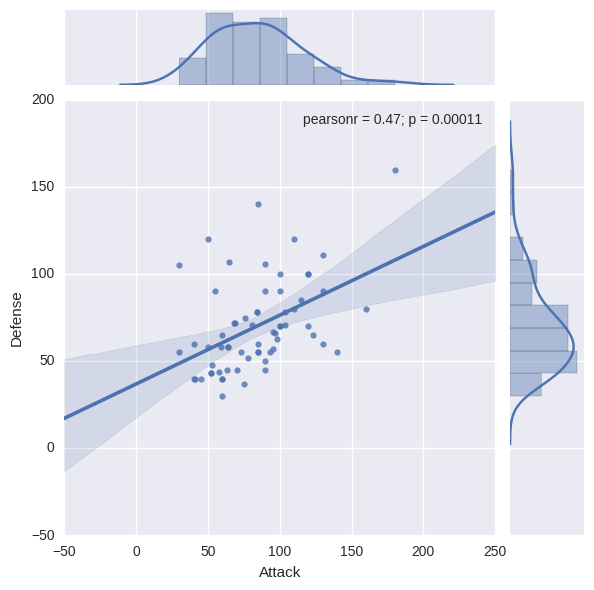

In [81]:
sns.jointplot(x='Attack', y='Defense', data=df[(df['Type 1'] == 'Fire') | (df['Type 2'] == 'Fire')], kind='reg');

In [82]:
fogo = df[(df['Type 1'] == 'Fire') | (df['Type 2'] == 'Fire')]
agua = df[(df['Type 1'] == 'Water') | (df['Type 2'] == 'Water')]
planta = df[(df['Type 1'] == 'Grass') | (df['Type 2'] == 'Grass')]

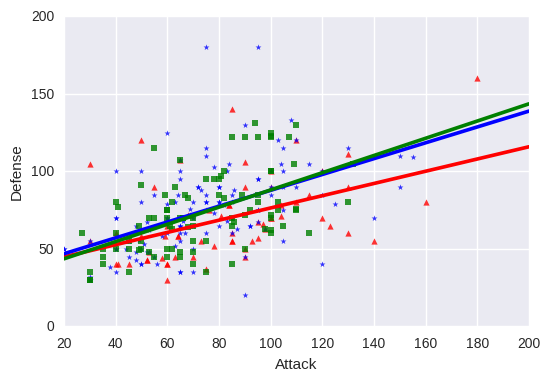

In [86]:
sns.regplot(x='Attack', y='Defense', data=fogo, ci=None, color='red', marker='^');
sns.regplot(x='Attack', y='Defense', data=agua, ci=None, color='blue', marker='*');
sns.regplot(x='Attack', y='Defense', data=planta, ci=None, color='green', marker=',');

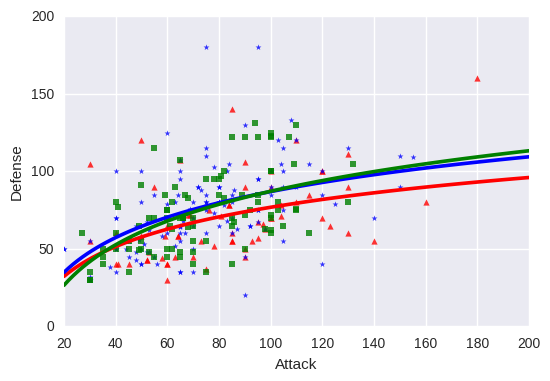

In [87]:
sns.regplot(x='Attack', y='Defense', data=fogo, ci=None, color='red', marker='^', logx=True);
sns.regplot(x='Attack', y='Defense', data=agua, ci=None, color='blue', marker='*', logx=True);
sns.regplot(x='Attack', y='Defense', data=planta, ci=None, color='green', marker=',', logx=True);

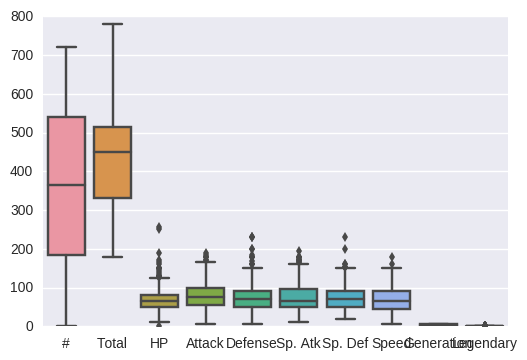

In [90]:
sns.boxplot(data=df);

In [91]:
df.corr()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,1.000000,0.119813,0.097614,0.102298,0.094786,0.088759,0.085817,0.010733,0.982516,0.153396
Total,0.119813,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384,0.501758
HP,0.097614,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.102298,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.094786,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.088759,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.085817,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.010733,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.982516,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.153396,0.501758,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


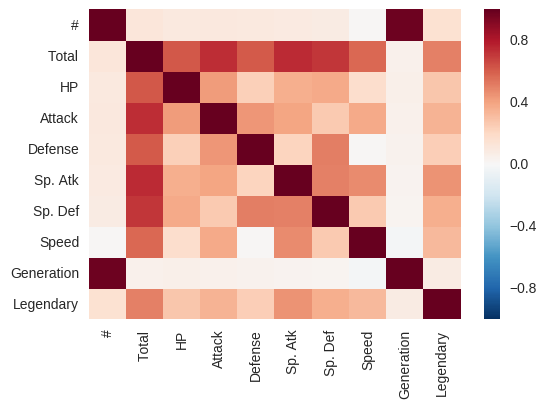

In [93]:
sns.heatmap(df.corr());

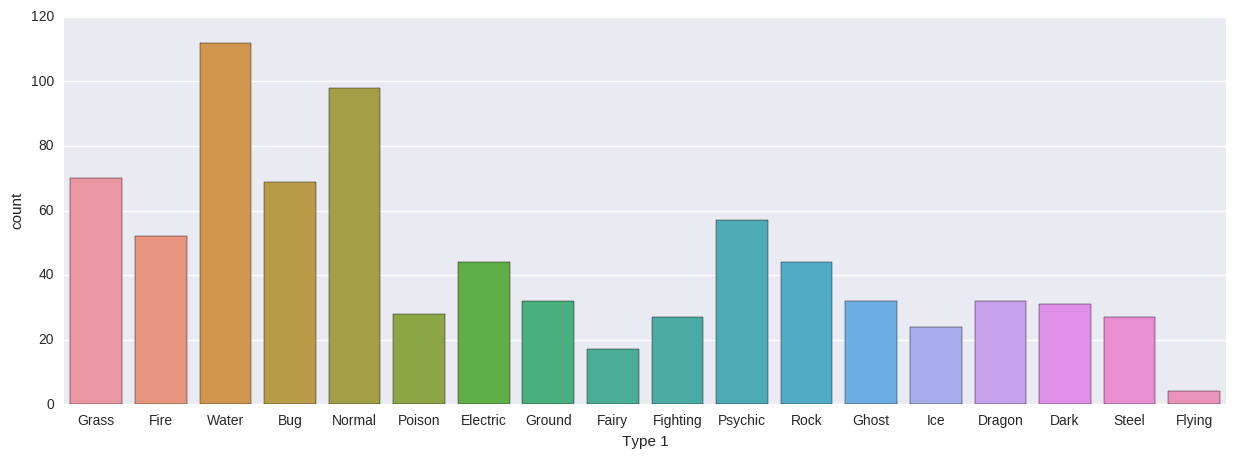

In [100]:
plt.rcParams['figure.figsize'] = (15, 5)
sns.countplot(x='Type 1', data=df);

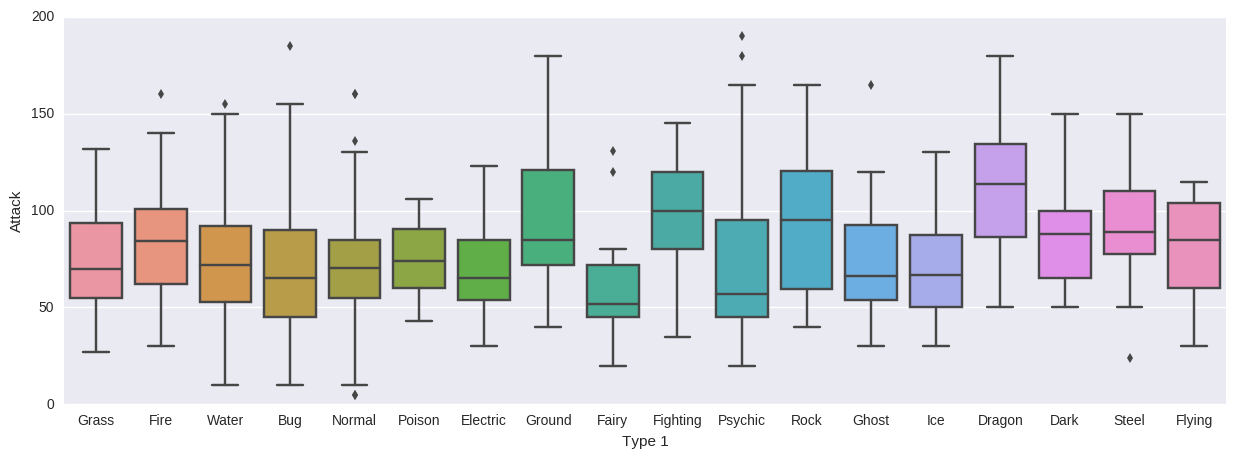

In [103]:
sns.boxplot(x='Type 1', y='Attack', data=df);

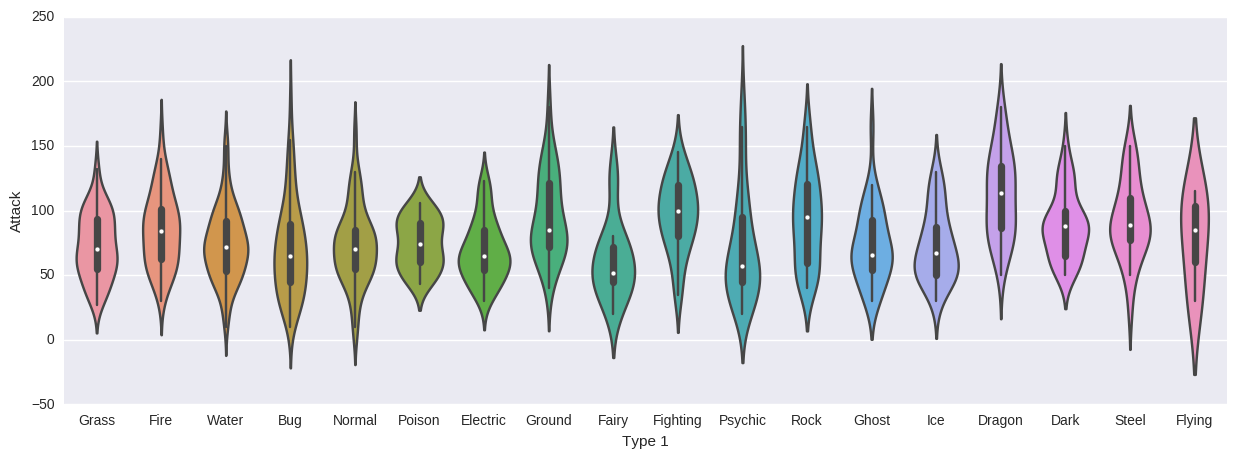

In [105]:
sns.violinplot(x='Type 1', y='Attack', data=df);

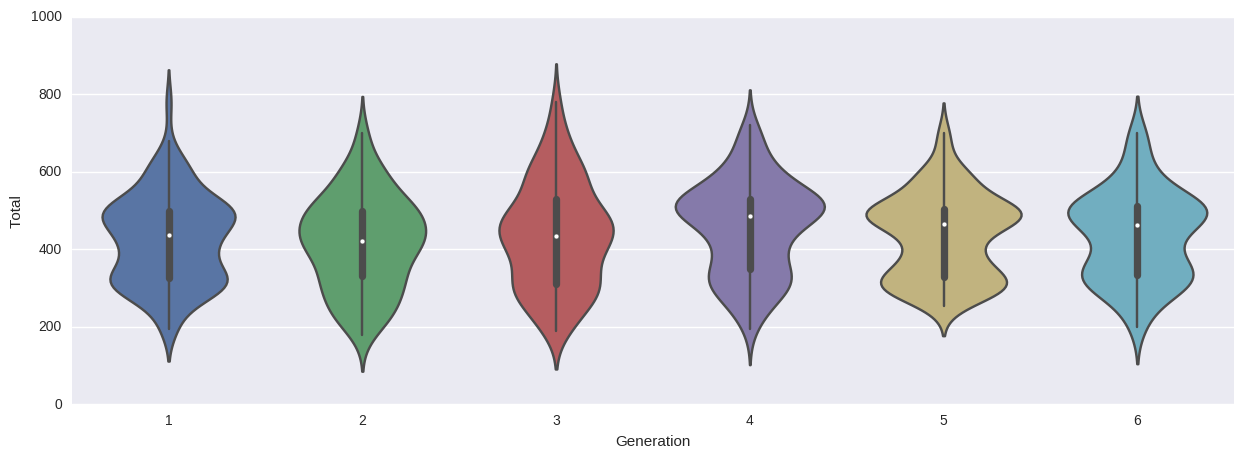

In [106]:
sns.violinplot(x='Generation', y='Total', data=df);

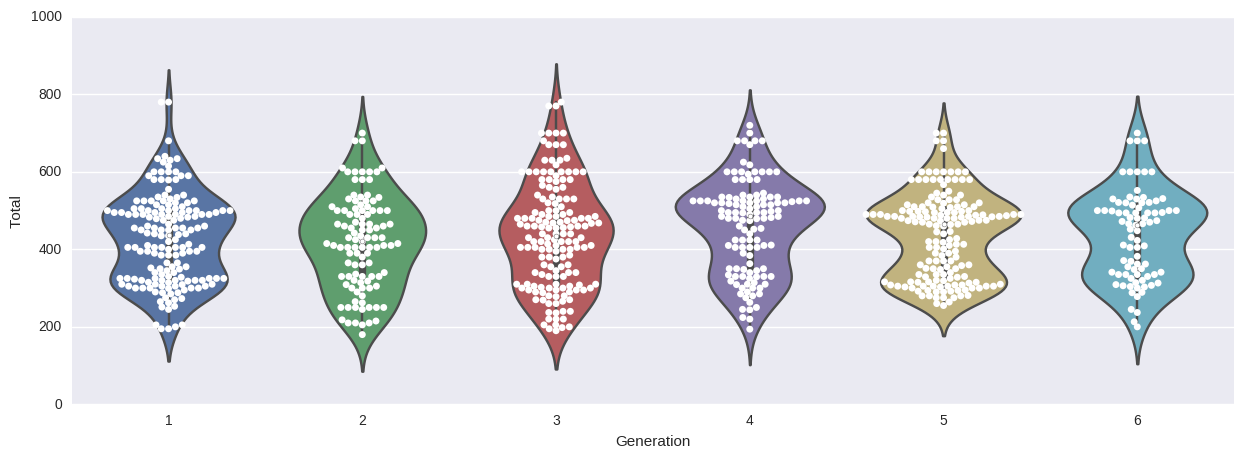

In [107]:
sns.swarmplot(x='Generation', y='Total', data=df, color='white')
sns.violinplot(x='Generation', y='Total', data=df);

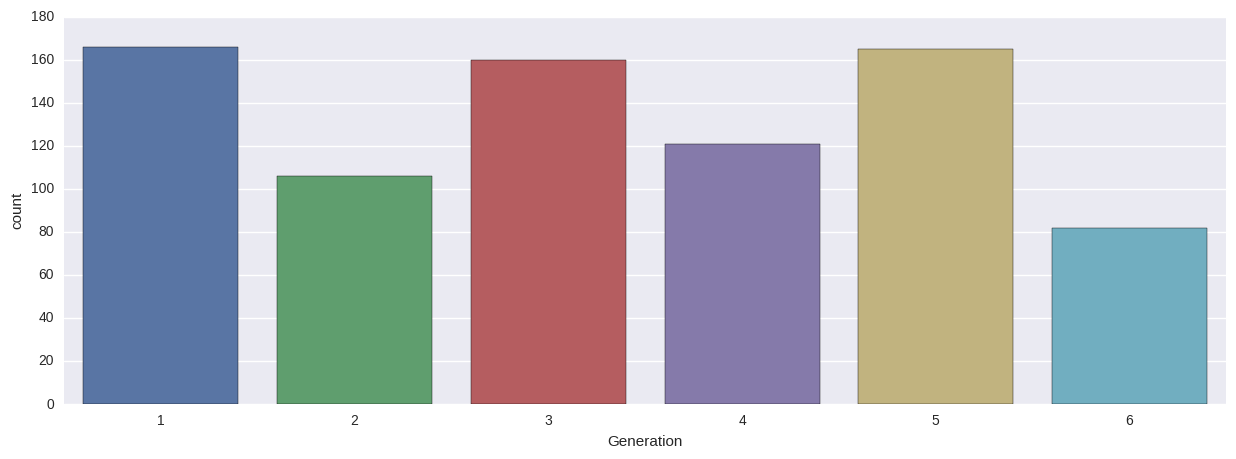

In [109]:
sns.countplot(x='Generation', data=df);